# **Задача 2. Обучение без учителя**

In [ ]:
!pip install opendatasets

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')

Скачаем набор данных о распознавании человеческой активности, который был создан на основе записей 30 испытуемых, выполняющих повседневные действия при ношении закрепленного на поясе смартфона со встроенными инерционными датчиками.

In [49]:
od.download(
	"https://www.kaggle.com/datasets/mboaglio/simplifiedhuarus")

Skipping, found downloaded files in "./simplifiedhuarus" (use force=True to force download)


In [50]:
# reading the CSV file
file =('./simplifiedhuarus/\
train.csv')
df = pd.read_csv(file)

# displaying the contents of the CSV file
df.head()


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


## **EDA**



In [51]:
df.shape

(3609, 563)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [53]:
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

Закодируем виды активности.

In [54]:
attribute_dict = {}
for i, typ in enumerate(df['activity'].unique()):
  attribute_dict[typ] = i

df = df.replace(attribute_dict)

In [55]:
X = df.drop(columns=["activity", "rn"])
y = df['activity']

## **Визуализация с помощью PCA и t-SNE**

CPU times: user 267 ms, sys: 148 ms, total: 414 ms
Wall time: 231 ms


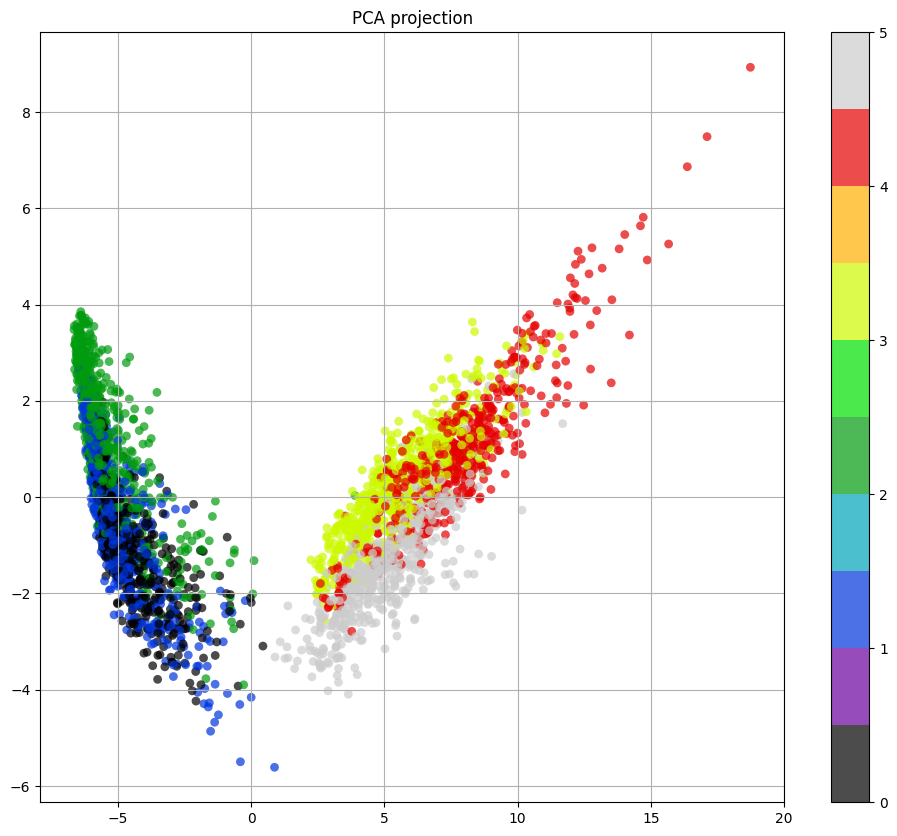

In [56]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c=y,
            edgecolor='none',
            alpha=0.7,
            s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection')
plt.grid(None)

После применения PCA можно различить, как минимум, две группы данных. Предположительно, одна группа содержит динамическую активность (ходьба, подъем, спуск), а вторая &mdash; статическую (положение стоя, сидя, лежа). Однако конкретные виды активности перемешаны.

CPU times: user 1min 3s, sys: 219 ms, total: 1min 4s
Wall time: 54.4 s


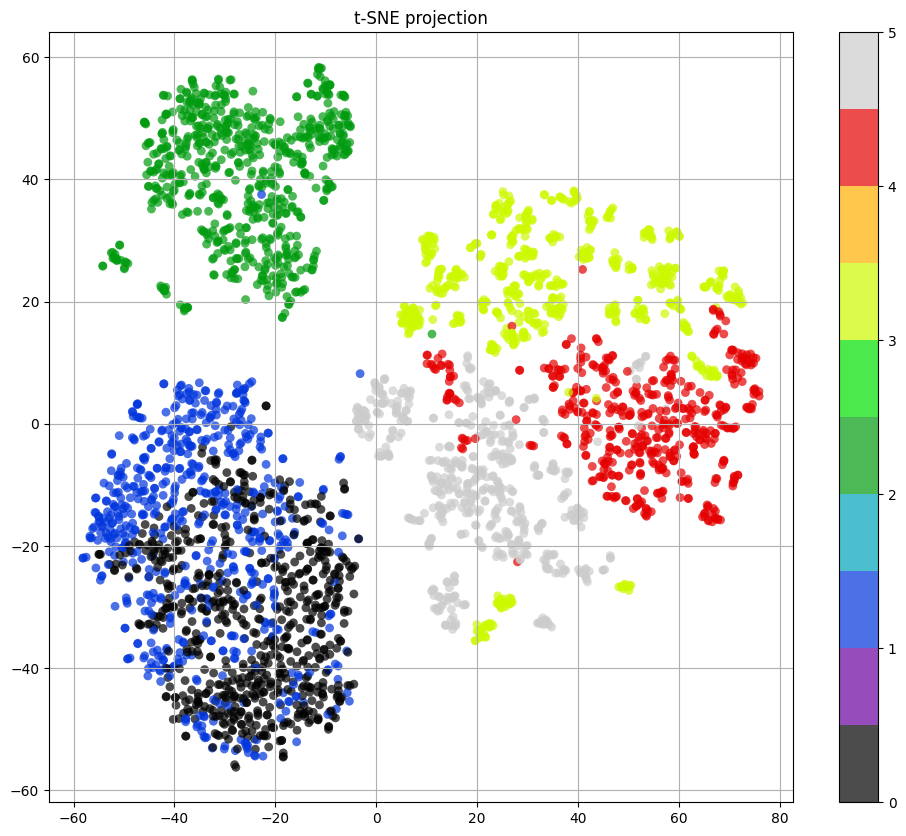

In [57]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("t-SNE projection")
plt.grid(None)

t-SNE показывает более хорошие результаты: образуются довольно явные группы, где, предположительно, в правой части графика изображены измерения статической активности, а в левой &mdash; динамической, однако синие и черные объекты (которые, по предположению, описывают подъем и спуск) довольно сильно перемешаны.

## **Снижение размерности при помощи PCA**

Для начала посмотрим, какой процент дисперсии описывают разное количество компонент.

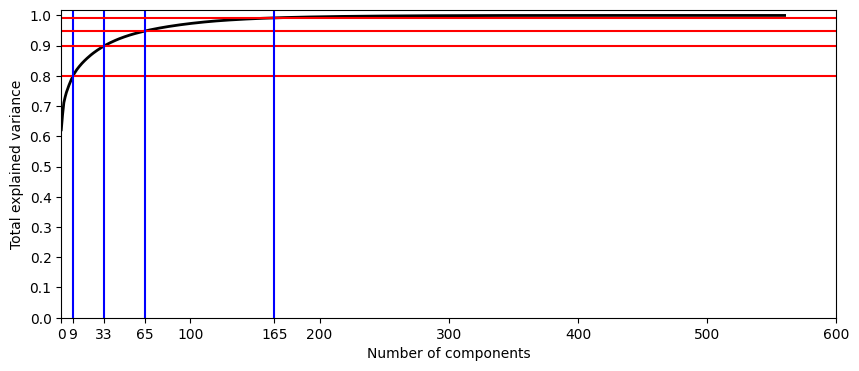

In [58]:
pca = PCA().fit(X)

plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 570)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(list(plt.xticks()[0]) + [9, 33, 65, 165])
plt.axhline(0.8, c='r')
plt.axvline(9, c='b')
plt.axhline(0.9, c='r')
plt.axvline(33, c='b')
plt.axhline(0.95, c='r')
plt.axvline(65, c='b')
plt.axhline(0.99, c='r')
plt.axvline(165, c='b')
plt.show();

На графике видно следующее:

* 9 компонент описывают ~80% дисперсии
* 33 компонент описывают ~90% дисперсии
* 65 компонент описывают ~95% дисперсии
* 165 компонент описывают ~99% дисперсии

Далее, начиная со 166, добавление новых компонент практически не приносит новой информации.

## **Реализация K-means**

In [59]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.estimator_checks import check_estimator

class BaseKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=10, tol=1e-4, random_state=None, max_iter=1000):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state
        self.max_iter = max_iter


    def fit(self, x, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]

        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]

        self.n_iter_ = 1

        max_shift = np.inf
        while max_shift > self.tol and self.n_iter_ < self.max_iter:
            self.labels_ = self._get_labels(x)
            new_centers = np.empty((self.n_clusters, self.n_features_in_))
            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(x[self.labels_ == label], axis=0)

            max_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))
            self.cluster_centers_ = new_centers
            self.n_iter_ += 1

        return self


    def predict(self, x):
        check_is_fitted(self)
        return self._get_labels(check_array(x))


    def _get_labels(self, x):
        return np.argmin(
            np.linalg.norm(x[..., None] - self.cluster_centers_.T, axis=1),
            axis=1,
        )


check_estimator(BaseKMeans())

## **Обучение**

Будем обучать модели на исходном датасете, а также на производных от него со сниженной размерностью до 9, 33, 65, 165 компонент.

In [60]:
Xs = [PCA(n_components=i).fit_transform(X) for i in [9, 33, 65, 165]]
Xs.append(X)

Для оценки качества обучения будем использовать метрики, основанные на сравнении предсказанных и истинных значений:

* Adjusted Rand Index (ARI)
* Adjusted Mutual Information (AMI)
* Fowlkes-Mallows Index (FMI)

Подбор гиперпараметров будет осуществляться перебором.

In [61]:
from pathlib import Path
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
import time
from sklearn import clone
from itertools import product

results_path = Path("train_results.csv")


def make_combs(params):
    completed_params = [[(key, v) for v in params[key]] for key in params]
    combs = [dict(param) for param in product(*completed_params)]

    return combs


def train(estimator, param_variations=None):
    combs = make_combs(param_variations)

    results = []

    for X in Xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for params in combs:
            e = clone(estimator).set_params(**params)
            start_time = time.perf_counter()
            pred = e.fit_predict(X)
            predict_time = (time.perf_counter() - start_time)

            ari = adjusted_rand_score(y, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, predict_time, params

            ami = adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, predict_time, params

            fmi = fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, predict_time, params

        print(
            f"Best parameters for {X.shape[1]}:",
            f"By ARI: {best_ari[2]} : {best_ari[0]}",
            f"By AMI: {best_ami[2]} : {best_ami[0]}",
            f"By FMI: {best_fmi[2]} : {best_fmi[0]}",
            "",
            sep="\n",
        )

        best_res = {
            "Clusterer": estimator.__class__.__name__,
            "Components number": X.shape[1],
            "ARI": best_ari[0],
            "AMI": best_ami[0],
            "FMI": best_fmi[0],
            "Fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]])
        }
        results.append(best_res)

    pd.DataFrame(results).to_csv(results_path, mode="a", header=not results_path.exists())

    return results

In [62]:
state = 42
n_clusters = 6

In [63]:
%%time

basekmeans_results = train(BaseKMeans(n_clusters=n_clusters, random_state=state), {})

Best parameters for 9:
By ARI: {} : 0.4682883127822563
By AMI: {} : 0.5997548578797837
By FMI: {} : 0.5647932328788116

Best parameters for 33:
By ARI: {} : 0.46403583258787956
By AMI: {} : 0.5967140020654779
By FMI: {} : 0.5611246766793317

Best parameters for 65:
By ARI: {} : 0.4624159053711855
By AMI: {} : 0.5975703133481427
By FMI: {} : 0.5611554378012771

Best parameters for 165:
By ARI: {} : 0.4629048696388821
By AMI: {} : 0.5973604825302208
By FMI: {} : 0.5614927865873014

Best parameters for 561:
By ARI: {} : 0.4629048696388821
By AMI: {} : 0.5973604825302208
By FMI: {} : 0.5614927865873014

CPU times: user 2.2 s, sys: 1.38 s, total: 3.58 s
Wall time: 3.63 s


In [64]:
%%time

from sklearn.cluster import KMeans

kmeans_results = train(
    KMeans(n_clusters=n_clusters, random_state=state),
    {
        "algorithm": ["lloyd", "elkan"],
        "tol": [5e-5, 1e-4, 5e-5, 1e-3],
        "max_iter": [200, 300, 400]
    },
)

Best parameters for 9:
By ARI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.4681577319392592
By AMI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.5996261179546978
By FMI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.5647261119039161

Best parameters for 33:
By ARI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} : 0.4651567535111106
By AMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} : 0.5989282555779945
By FMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} : 0.5639376515677746

Best parameters for 65:
By ARI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.46694468754703183
By AMI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.6006169976879108
By FMI: {'algorithm': 'lloyd', 'tol': 0.001, 'max_iter': 200} : 0.5660556496832149

Best parameters for 165:
By ARI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} : 0.46645539386536794
By AMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} : 0.600

In [65]:
%%time
from sklearn.cluster import DBSCAN

dbscan_results = train(
    DBSCAN(n_jobs=-1),
    {
        "eps": [0.5, 0.75, 1, 2, 5],
        "min_samples": [2, 3, 5, 10, 20],
    }
)

Best parameters for 9:
By ARI: {'eps': 1, 'min_samples': 2} : 0.3380559811605625
By AMI: {'eps': 2, 'min_samples': 10} : 0.5256002833438556
By FMI: {'eps': 2, 'min_samples': 10} : 0.5636251922371432

Best parameters for 33:
By ARI: {'eps': 2, 'min_samples': 2} : 0.07885076148268995
By AMI: {'eps': 2, 'min_samples': 3} : 0.2822626090330283
By FMI: {'eps': 0.5, 'min_samples': 2} : 0.4104650327667447

Best parameters for 65:
By ARI: {'eps': 5, 'min_samples': 20} : 0.0009756132834062939
By AMI: {'eps': 2, 'min_samples': 2} : 0.04793005964950842
By FMI: {'eps': 0.5, 'min_samples': 2} : 0.4104650327667447

Best parameters for 165:
By ARI: {'eps': 5, 'min_samples': 20} : 0.005317003733389058
By AMI: {'eps': 5, 'min_samples': 10} : 0.02686009251464609
By FMI: {'eps': 0.5, 'min_samples': 2} : 0.4104650327667447

Best parameters for 561:
By ARI: {'eps': 5, 'min_samples': 20} : 0.007643468925893775
By AMI: {'eps': 5, 'min_samples': 10} : 0.038129672358614614
By FMI: {'eps': 0.5, 'min_samples': 2}

## **Сравнение моделей**

In [66]:
train_results = pd.read_csv(results_path)
train_results = train_results.drop(columns="Unnamed: 0")

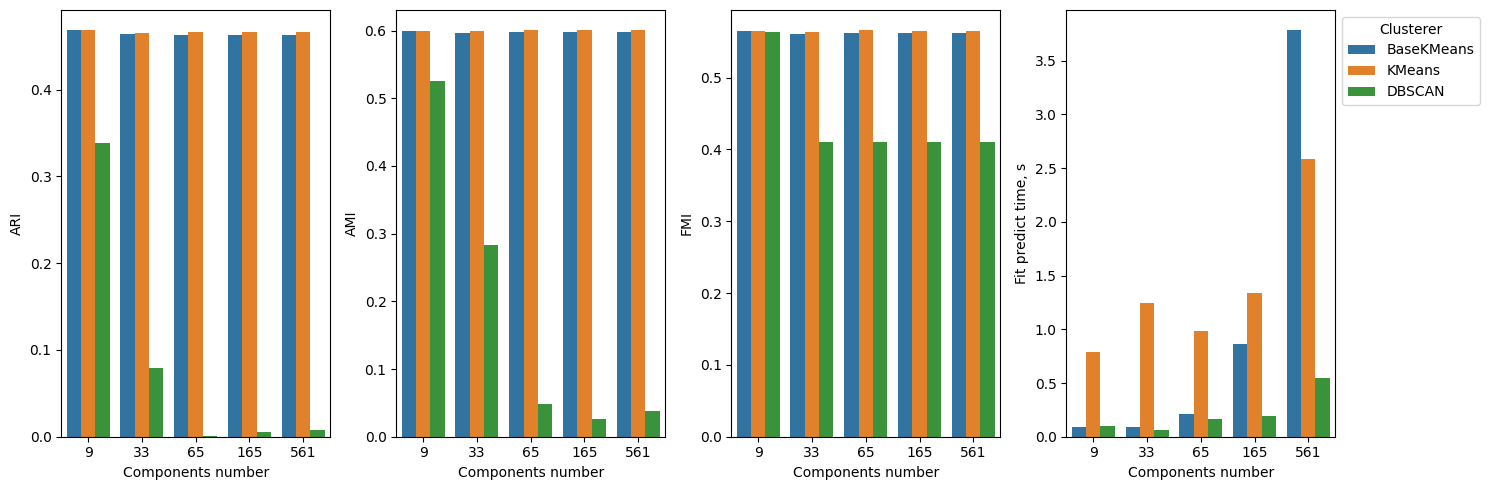

In [67]:
import seaborn as sns

fig, axs = plt.subplots(ncols=4, figsize=(15, 5))

for metric, ax in zip(["ARI", "AMI", "FMI", "Fit predict time, s"], axs.flatten()):
    sns.barplot(train_results, x="Components number", y=metric, hue="Clusterer", ax=ax, ci=None)
    if metric == "Fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()

Можно сделать следующие выводы:

* На малом количестве компонент (а именно 9) DBSCAN еще может конкурировать с K-means по качеству кластеризации, однако с ростом количества компонент DBSCAN показывает худшие результаты.
* DBSCAN показывает лучшее время работы по сравнению с обеими реализациями K-means, кроме случая с 9-ю компонентами.
* Уменьшение размерности позволило сильно сократить время обучения алгоритмом K-means. Более того, это не повлияло на качество кластеризации.
* В общем и целом, алгоритм K-means показал себя лучше, чем DBSCAN, причем библиотечная реализация показала себя хуже в рамках времени работы, кроме случая без уменьшения размерности.